# Experiment: Testing EMSC

**Date**: 31 Oct 2024 

**Sample**: water with glucose

## Data Collection
### Raman Spectra

| Name           | Value                   |
|----------------|-------------------------|
| slit           | 0.25                    |
| Grating        | 600                     |
| Laser          | 785 nm                  |
| Laser Power    | 10, 7.0 A, 350 mW       |
| Spectro Center | 1125 $\texttt{cm}^{-1}$ |
| Exposure Time  | vary                    |
| Accumulation   | 3 times                 |

In [16]:
from raman_for_glucose_measurement.helper import create_data_from_paths, extract_range
import rampy as rp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from pathlib import Path
from glob import glob 

In [17]:
DATA_BASE_PATH:Path = Path("../data/water/")
DATA_PATH:Path      = DATA_BASE_PATH.joinpath("configuration")
assert DATA_PATH.exists()

## Load Data

In [18]:
paths:list[str] = glob(str(DATA_PATH.joinpath('*')))
data = create_data_from_paths(paths=paths)
data.sort_values(by=['datetime'], inplace=True)
data

,path,spectrum,name,grating,laser,exposure,accumulation,datetime
8,../data/water/configuration/silicon_600_785 nm...,"[[-2324.94, 77.0], [-2321.49, 88.0], [-2318.05...",silicon,600,785 nm,30 s,3,2024-10-21 14:40:21
20,../data/water/configuration/silicon_600_785 nm...,"[[-2324.94, 80.0], [-2321.49, 93.0], [-2318.05...",silicon,600,785 nm,30 s,3,2024-10-21 14:41:02
23,../data/water/configuration/noise_600_785 nm_3...,"[[-2324.94, 33.5], [-2321.49, 40.5], [-2318.05...",noise,600,785 nm,30 s,3,2024-10-21 14:41:56
21,../data/water/configuration/water-surface_600_...,"[[-1392.39, 80.3333], [-1389.38, 90.3333], [-1...",water-surface,600,785 nm,30 s,1,2024-10-21 14:58:05
10,../data/water/configuration/water-7mm_600_785 ...,"[[-1392.39, 79.3333], [-1389.38, 85.3333], [-1...",water-7mm,600,785 nm,30 s,1,2024-10-21 15:01:19
9,../data/water/configuration/water-7mm_600_785 ...,"[[-1392.39, 159.333], [-1389.38, 170.0], [-138...",water-7mm,600,785 nm,90 s,1,2024-10-21 15:06:19
5,../data/water/configuration/water-7mm_600_785 ...,"[[-1392.39, 209.667], [-1389.38, 217.0], [-138...",water-7mm,600,785 nm,120 s,1,2024-10-21 15:18:30
25,../data/water/configuration/water-7mm_600_785 ...,"[[-1392.39, 235.667], [-1389.38, 249.333], [-1...",water-7mm,600,785 nm,150 s,1,2024-10-21 15:26:28
13,../data/water/configuration/water-7mm_600_785 ...,"[[-1392.39, 264.667], [-1389.38, 282.667], [-1...",water-7mm,600,785 nm,180 s,1,2024-10-21 15:36:23
16,../data/water/configuration/water-7mm_600_785 ...,"[[-1392.39, 336.0], [-1389.38, 352.333], [-138...",water-7mm,600,785 nm,240 s,1,2024-10-21 15:48:50


## Noise Checking

In [162]:
from sklearn.preprocessing import MinMaxScaler

def plot(data:pd.DataFrame, title:str="", vlines=[], key='spectrum'):
    minmax = MinMaxScaler()
    colors = {
        'water-surface': 'blue',
        'water-7mm': 'green',
        'silicon-water': 'yellow',
        'water-glass': 'red',
    }
    default_color = 'grey'
    ymin, ymax = np.inf, -1*np.inf
    plt.figure(figsize=(16,5))
    for index, row in data.iterrows():
        color = default_color
        if(row['name'] in colors.keys()):
            color = colors[row['name']]
        X,y = None,None

        if(row['name'] == 'glucose'):
            X = row['spectrum'][:,0]
            y = minmax.fit_transform(row['spectrum'][:,1].reshape(-1,1))
        else:
            X = row[key][:,0]
            y = minmax.fit_transform(row[key][:,1].reshape(-1,1))


        if(isinstance(type(X), type(None))):
            print(row)

        if(row['name'] == 'silicon'):
            plt.plot(X,y, label=f"{row['name']}", linestyle='--', c=color)
        else:
            plt.plot(X,y, label=f"{row['name']} {row['exposure']}", c=color)

        if(ymin > y.min()): ymin = y.min()
        if(ymax < y.max()): ymax = y.max()

    # Remove duplicate labels
    # handles, labels = plt.gca().get_legend_handles_labels()
    # labels, ids = np.unique(data.glycemic, return_index=True)
    # handles = [handles[i] for i in ids]
    # plt.legend(handles, labels, loc='best')
    for vline in vlines:
        plt.vlines(x=vline, linestyles='--', ymin=ymin, ymax=ymax)
    plt.legend()

    plt.xlabel("Raman shift, cm$^{-1}$", fontsize = 12)
    plt.ylabel("intensity, a. u.", fontsize = 12)
    plt.title(title,fontsize = 12,fontweight="bold")
    plt.grid()
    plt.show()



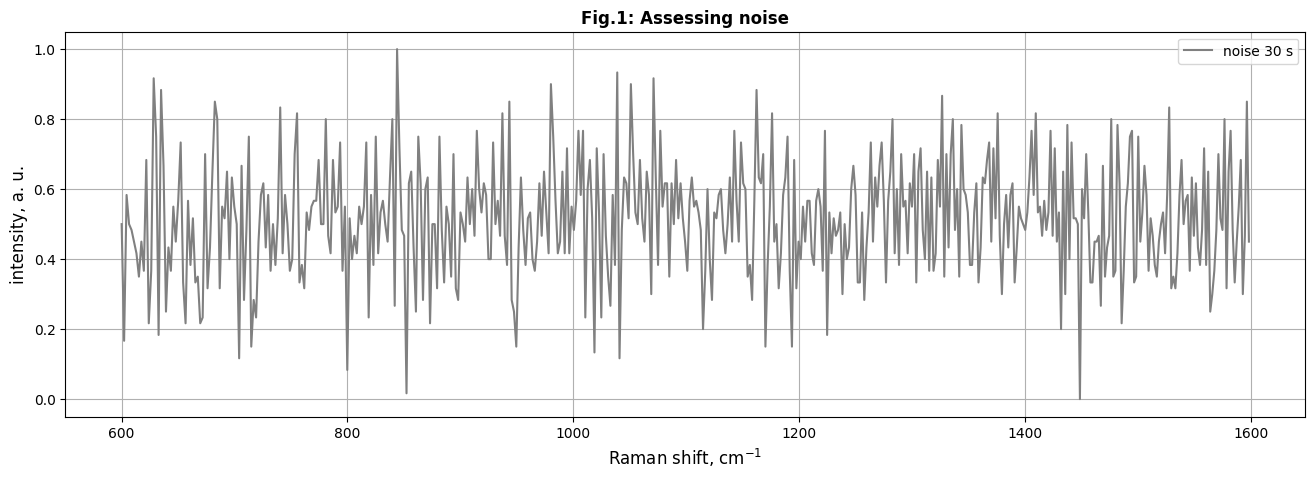

In [141]:
samples = ['noise']
plot(data=data.loc[data.name.isin(samples)], title="Fig.1: Assessing noise")

## Configuration

There are 4 main configurations.

1. water-surface: A beaker of water - focus on the surface.
2. water-7mm:  A beaker of water - focus 7mm under the surface.
3. silicon-water: A droplet of water on the silicon. Focus on the silicon.
4. water-glass: A droplet of water on the thin glass slide. Focus on the substrate.


## Pure spectra

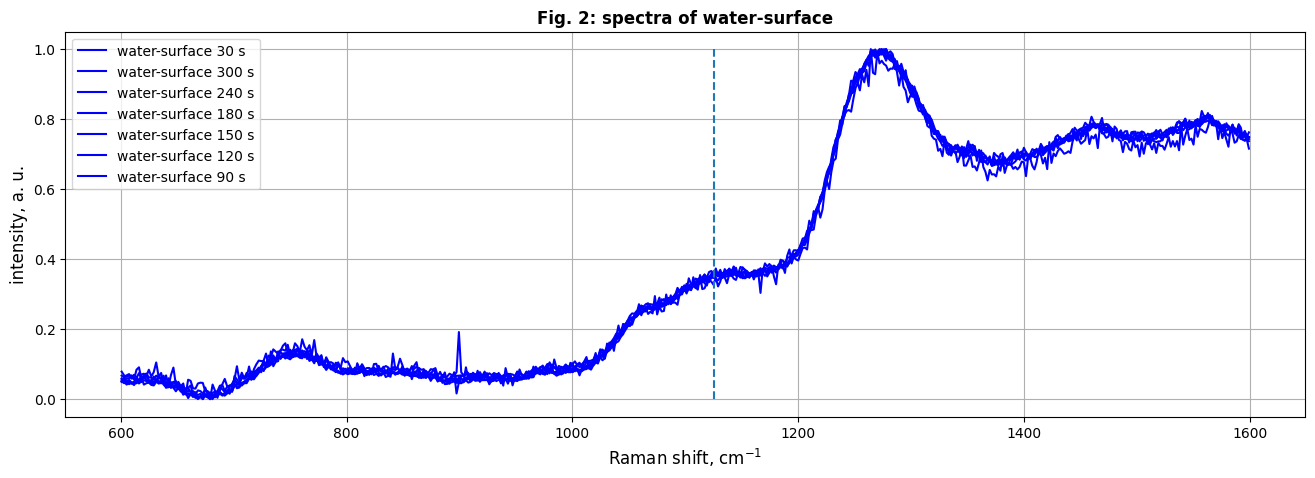

In [142]:
samples = ['water-surface']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 2: spectra of water-surface", vlines=[1125])

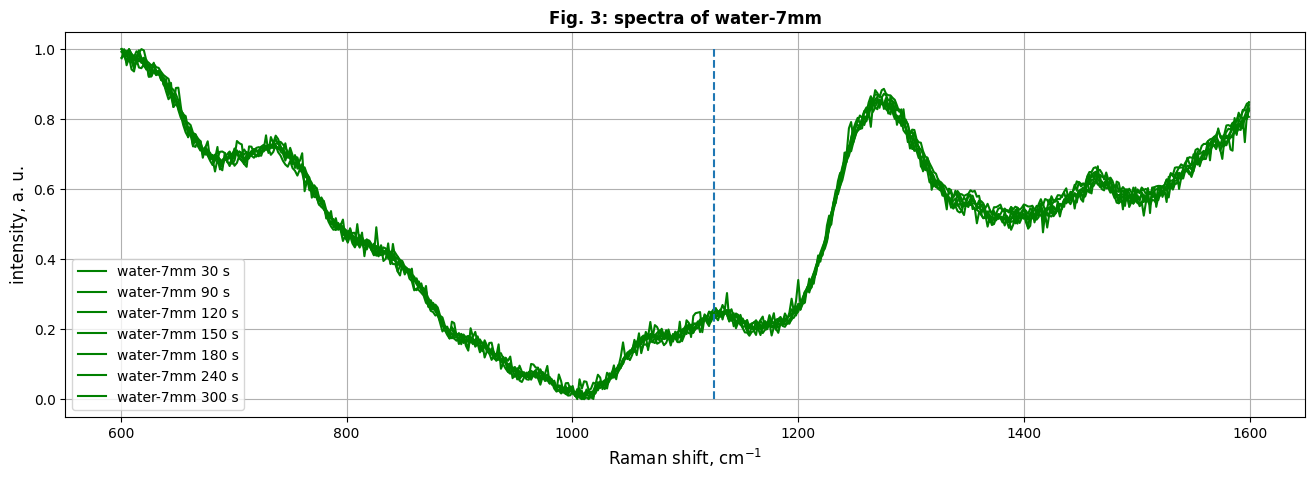

In [143]:
samples = ['water-7mm']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 3: spectra of water-7mm", vlines=[1125])

It is shown that, in general, the spectra of `water-7mm` is much stronger than the `water-surface`.

## Extracting interested range

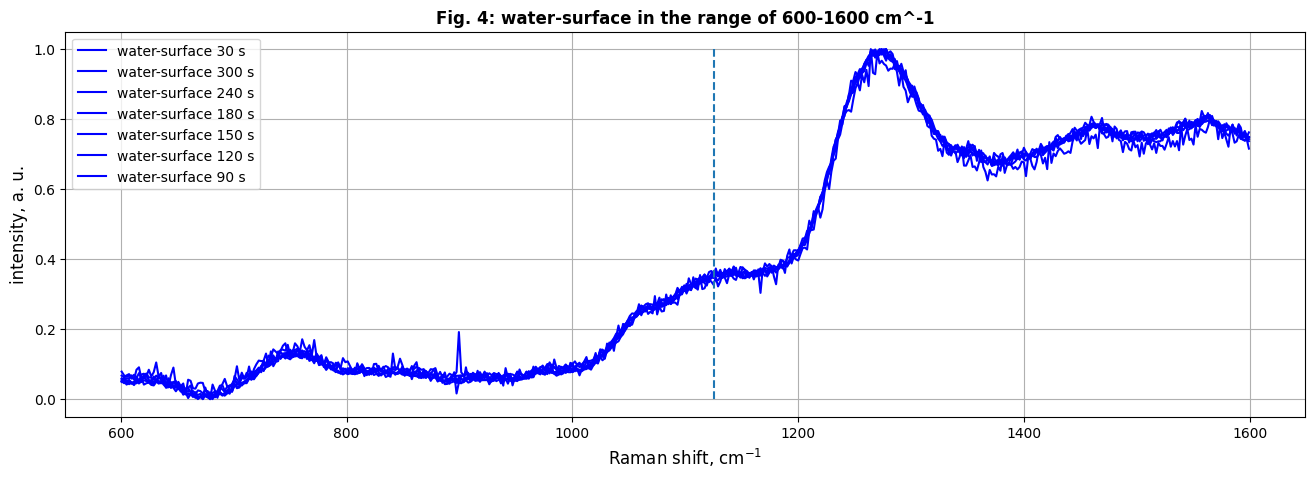

In [144]:
def cal_range(row):
    spectrum = row.spectrum
    return extract_range(spectrum=spectrum, range_from=600, range_to=1600)

samples = ['water-surface']
data.spectrum = data.apply(cal_range, axis=1)
plot(data=data.loc[data.name.isin(samples)], title="Fig. 4: water-surface in the range of 600-1600 cm^-1", vlines=[1125])

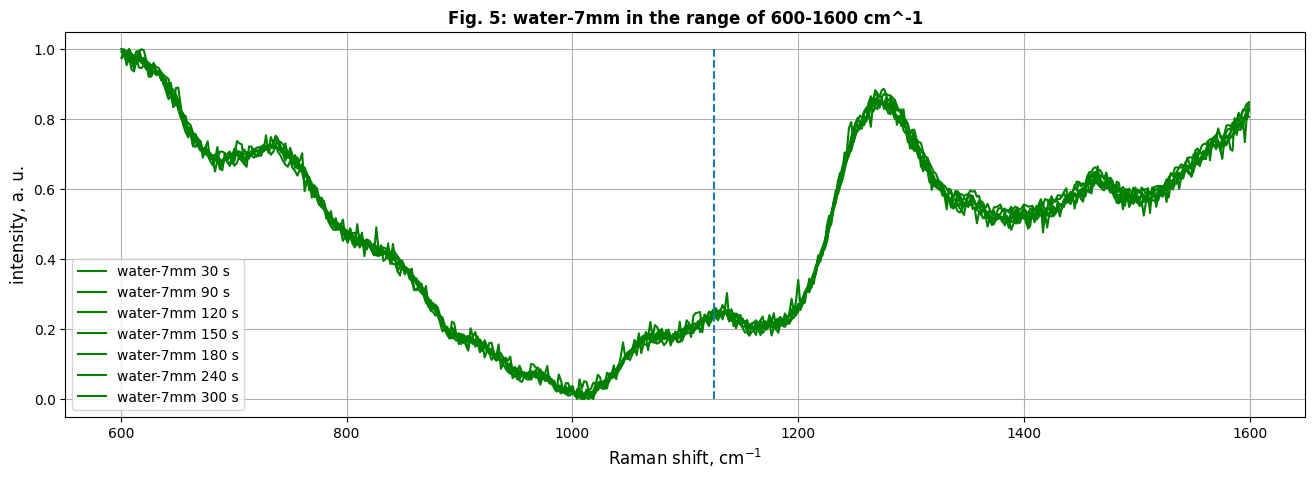

In [145]:
samples = ['water-7mm']
data.spectrum = data.apply(cal_range, axis=1)
plot(data=data.loc[data.name.isin(samples)], title="Fig. 5: water-7mm in the range of 600-1600 cm^-1", vlines=[1125])

## Reference Glucose Signal

In [146]:
paths:list[str] = glob("../data/reference/glucose/*")
ref = create_data_from_paths(paths=paths)
ref.sort_values(by=['datetime'], inplace=True)
ref

,path,spectrum,name,grating,laser,exposure,accumulation,datetime
0,../data/reference/glucose/glucose_600_785 nm_3...,"[[-1399.6, 86.3333], [-1396.58, 99.6667], [-13...",glucose,600,785 nm,30 s,1,2024-10-29 14:47:57
2,../data/reference/glucose/glucose_600_785 nm_3...,"[[-1399.6, 94.3333], [-1396.58, 97.3333], [-13...",glucose,600,785 nm,30 s,1,2024-10-29 14:56:29
3,../data/reference/glucose/glucose_600_785 nm_9...,"[[-1399.6, 180.2], [-1396.58, 190.9], [-1393.5...",glucose,600,785 nm,90 s,1,2024-10-29 15:11:45
1,../data/reference/glucose/glucose_600_785 nm_3...,"[[-1399.6, 95.9], [-1396.58, 95.5], [-1393.57,...",glucose,600,785 nm,30 s,1,2024-10-29 15:16:59
4,../data/reference/glucose/glucose_600_785 nm_3...,"[[-1399.6, 95.9], [-1396.58, 98.7667], [-1393....",glucose,600,785 nm,30 s,1,2024-10-29 15:32:14


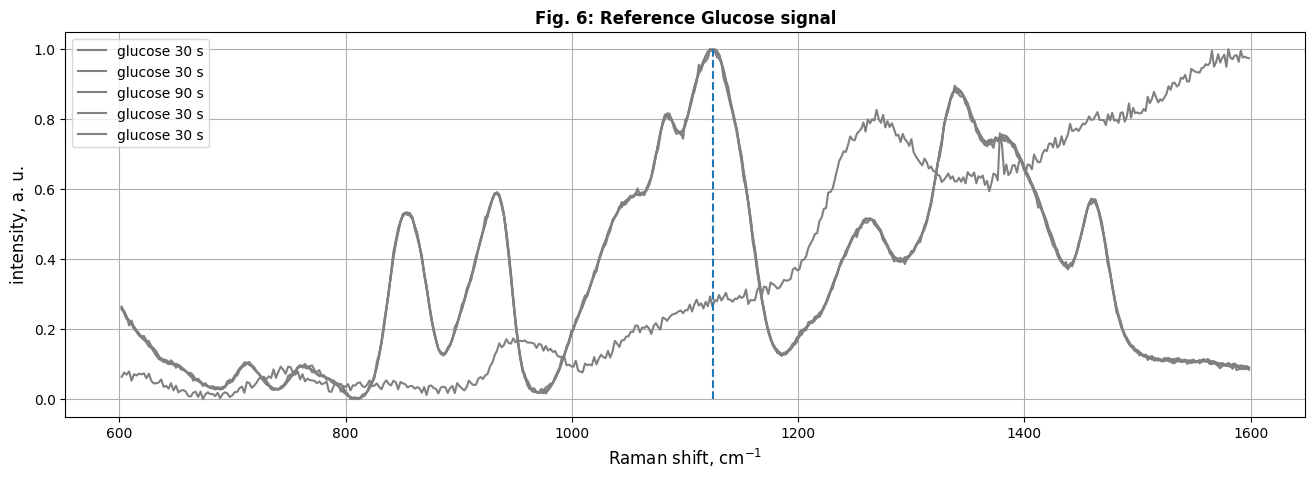

In [147]:
samples = ['glucose']
ref.spectrum = ref.apply(cal_range, axis=1)
plot(data=ref.loc[ref.name.isin(samples)], title="Fig. 6: Reference Glucose signal", vlines=[1125])

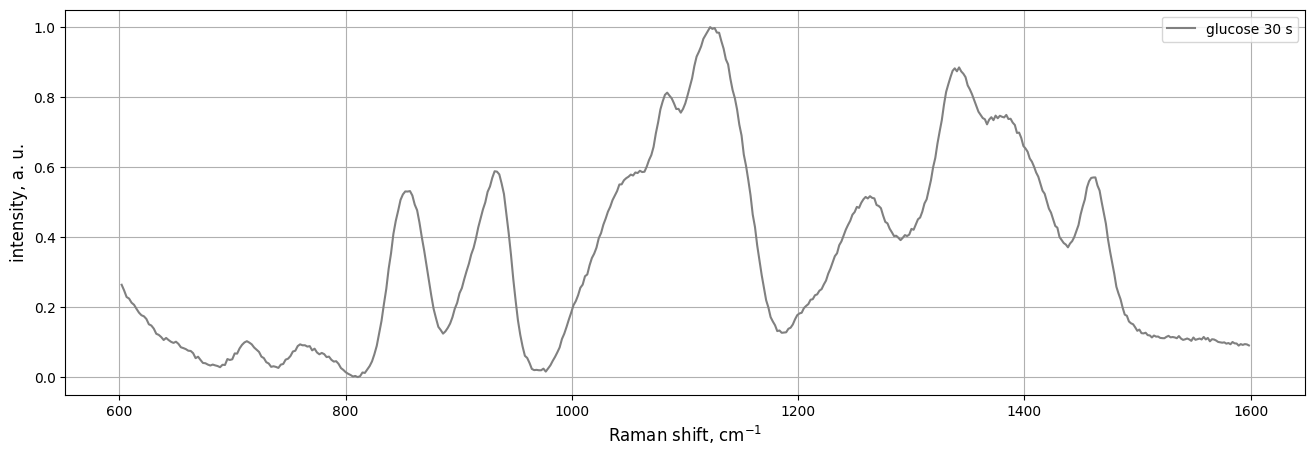

In [148]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
selected_ref = ref.loc[ref.index == 1]
selected_ref.spectrum.values[0][:,1] = minmax.fit_transform(selected_ref.spectrum.values[0][:,1].reshape(-1,1)).reshape(-1)
# plot(data=selected_ref, title="Fig. 7: Selected Reference Glucose signal", vlines=[1125])
plot(data=selected_ref, title="")

In [149]:
selected_ref

,path,spectrum,name,grating,laser,exposure,accumulation,datetime
1,../data/reference/glucose/glucose_600_785 nm_3...,"[[602.055, 0.26387508041405927], [604.248, 0.2...",glucose,600,785 nm,30 s,1,2024-10-29 15:16:59


## Extended multiplicative scatter/signal correction (EMSC)

In [150]:
from chemotools.scatter import ExtendedMultiplicativeScatterCorrection

emsc = ExtendedMultiplicativeScatterCorrection(reference=selected_ref.spectrum.values[0][:,1], order=2)
def cal_emsc(row):
    spectrum = row.spectrum
    x = spectrum[:,0][:501].reshape(-1,1)
    y = spectrum[:,1].reshape(1,-1)[:,:501]
    corrected_y = emsc.fit_transform(y).reshape(-1,1)
    s = np.hstack([x,corrected_y])
    return s

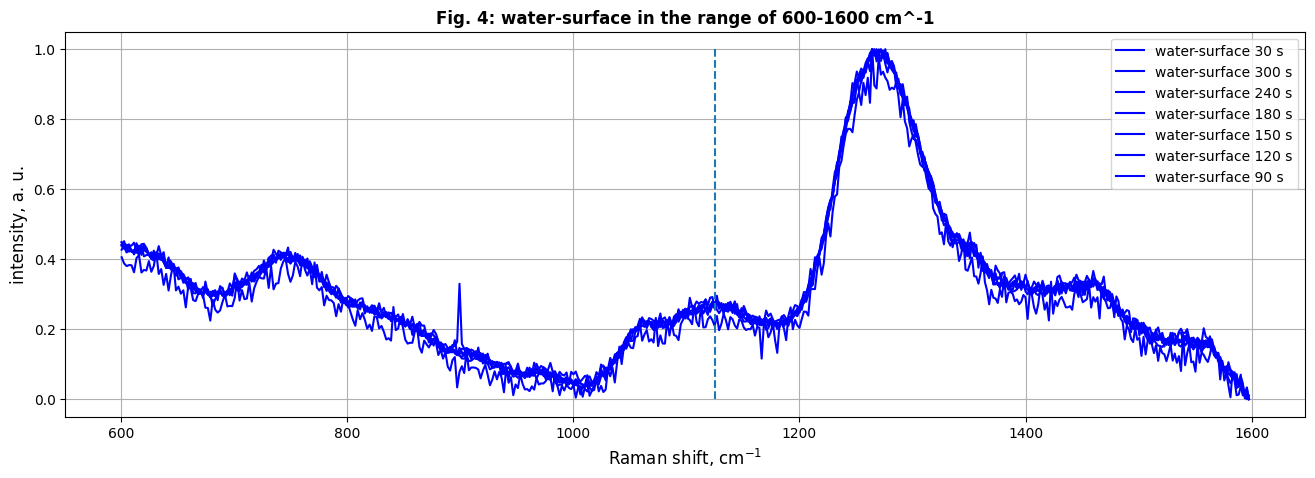

In [151]:
data['emsc'] = data.apply(cal_emsc, axis=1)
samples = ['water-surface']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 4: water-surface in the range of 600-1600 cm^-1", key='emsc', vlines=[1125])

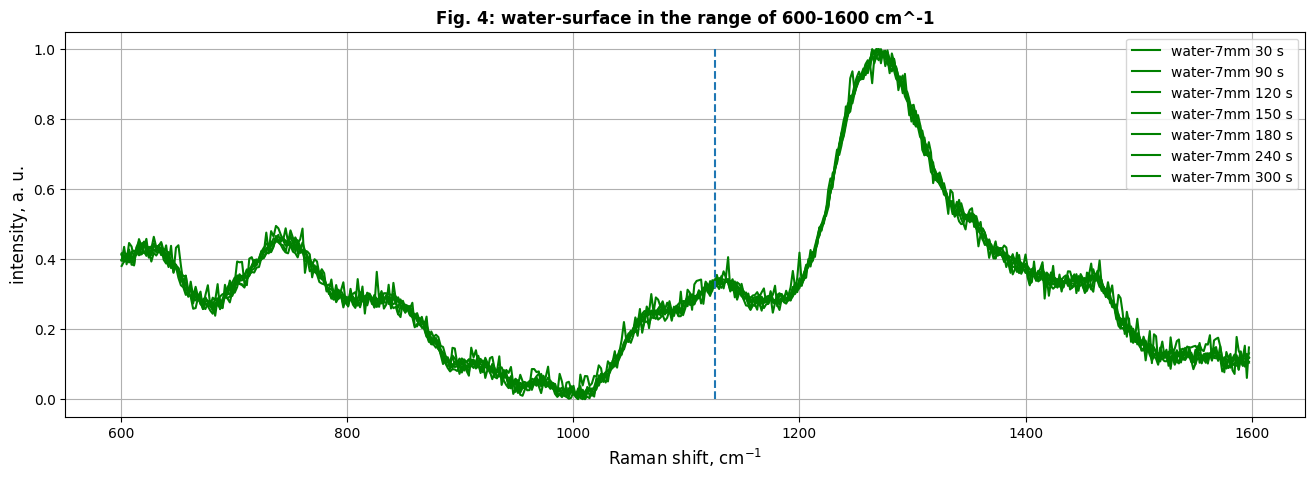

In [152]:
samples = ['water-7mm']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 4: water-surface in the range of 600-1600 cm^-1", key='emsc', vlines=[1125])

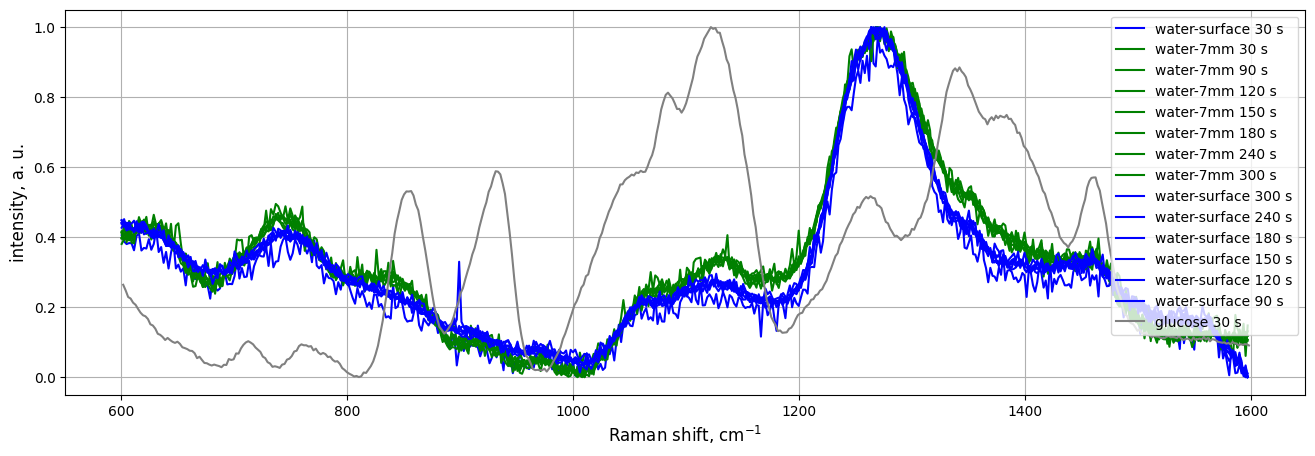

In [163]:
samples = ['water-surface','water-7mm']
# plot(data=data.loc[data.name.isin(samples)], title="Fig. 4: water-surface in the range of 600-1600 cm^-1", key='emsc')
plot(data=pd.concat([data.loc[data.name.isin(samples)], selected_ref]), title="", key='emsc')

In [118]:
pd.concat([data.loc[data.name.isin(samples)], selected_ref])

,path,spectrum,name,grating,laser,exposure,accumulation,datetime,emsc,myemsc
21,../data/water/configuration/water-surface_600_...,"[[600.681, 338.333], [602.873, 333.667], [605....",water-surface,600,785 nm,30 s,1,2024-10-21 14:58:05,"[[600.681, 1.2408104839906902], [602.873, 1.12...","([[43.889959897992846], [189.42515606667675], ..."
10,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 979.333], [602.873, 981.667], [605....",water-7mm,600,785 nm,30 s,1,2024-10-21 15:01:19,"[[600.681, 0.6492069854445351], [602.873, 0.71...","([[72.45624453551086], [2031.2290746538245], [..."
9,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 2904.67], [602.873, 2937.0], [605.0...",water-7mm,600,785 nm,90 s,1,2024-10-21 15:06:19,"[[600.681, 0.6771576873470627], [602.873, 0.84...","([[231.61091852167144], [6082.093752380236], [..."
5,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 3872.67], [602.873, 3856.67], [605....",water-7mm,600,785 nm,120 s,1,2024-10-21 15:18:30,"[[600.681, 0.7396470953823147], [602.873, 0.71...","([[307.5306671964567], [8132.843908715986], [-..."
25,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 4813.33], [602.873, 4792.67], [605....",water-7mm,600,785 nm,150 s,1,2024-10-21 15:26:28,"[[600.681, 0.7152321711358678], [602.873, 0.69...","([[378.4460174388058], [10138.479336747778], [..."
13,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 5791.67], [602.873, 5759.67], [605....",water-7mm,600,785 nm,180 s,1,2024-10-21 15:36:23,"[[600.681, 0.7451342551690815], [602.873, 0.70...","([[456.1987780156325], [12125.851158799158], [..."
16,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 7579.67], [602.873, 7597.0], [605.0...",water-7mm,600,785 nm,240 s,1,2024-10-21 15:48:50,"[[600.681, 0.5970215159871788], [602.873, 0.65...","([[629.3671930000198], [16130.250996746578], [..."
6,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 9563.0], [602.873, 9491.0], [605.06...",water-7mm,600,785 nm,300 s,1,2024-10-21 16:04:12,"[[600.681, 0.7225511957757426], [602.873, 0.65...","([[768.1045714248164], [20175.236880550456], [..."
3,../data/water/configuration/water-surface_600_...,"[[600.681, 3012.67], [602.873, 2978.33], [605....",water-surface,600,785 nm,300 s,1,2024-10-21 17:02:14,"[[600.681, 1.2343907760662634], [602.873, 1.14...","([[461.98450194261113], [1326.3025674583043], ..."
7,../data/water/configuration/water-surface_600_...,"[[600.681, 2413.33], [602.873, 2393.67], [605....",water-surface,600,785 nm,240 s,1,2024-10-21 18:22:25,"[[600.681, 1.2395570233793078], [602.873, 1.17...","([[355.8490536067161], [1021.6268760149844], [..."


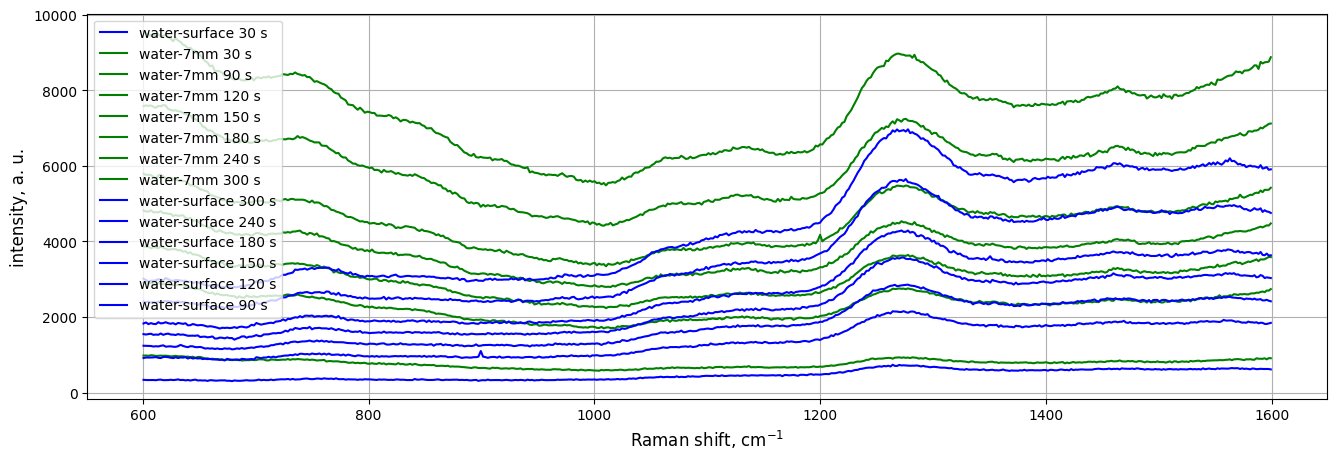

In [15]:
samples = ['water-surface','water-7mm']
# plot(data=data.loc[data.name.isin(samples)], title="Fig. 4: water-surface in the range of 600-1600 cm^-1", vlines=[1125])
plot(data=data.loc[data.name.isin(samples)], title="")

In [34]:
data

,path,spectrum,name,grating,laser,exposure,accumulation,datetime,emsc
8,../data/water/configuration/silicon_600_785 nm...,"[[600.082, 582.0], [602.27, 578.0], [604.458, ...",silicon,600,785 nm,30 s,3,2024-10-21 14:40:21,"[[600.082, 3.2302445014966983], [602.27, 3.082..."
20,../data/water/configuration/silicon_600_785 nm...,"[[600.082, 590.0], [602.27, 585.0], [604.458, ...",silicon,600,785 nm,30 s,3,2024-10-21 14:41:02,"[[600.082, 3.8604537193204833], [602.27, 3.666..."
23,../data/water/configuration/noise_600_785 nm_3...,"[[600.082, 41.5], [602.27, 31.5], [604.458, 44...",noise,600,785 nm,30 s,3,2024-10-21 14:41:56,"[[600.082, 0.8006153731116378], [602.27, -9.27..."
21,../data/water/configuration/water-surface_600_...,"[[600.681, 338.333], [602.873, 333.667], [605....",water-surface,600,785 nm,30 s,1,2024-10-21 14:58:05,"[[600.681, 1.2408104839906902], [602.873, 1.12..."
10,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 979.333], [602.873, 981.667], [605....",water-7mm,600,785 nm,30 s,1,2024-10-21 15:01:19,"[[600.681, 0.6492069854445351], [602.873, 0.71..."
9,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 2904.67], [602.873, 2937.0], [605.0...",water-7mm,600,785 nm,90 s,1,2024-10-21 15:06:19,"[[600.681, 0.6771576873470627], [602.873, 0.84..."
5,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 3872.67], [602.873, 3856.67], [605....",water-7mm,600,785 nm,120 s,1,2024-10-21 15:18:30,"[[600.681, 0.7396470953823147], [602.873, 0.71..."
25,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 4813.33], [602.873, 4792.67], [605....",water-7mm,600,785 nm,150 s,1,2024-10-21 15:26:28,"[[600.681, 0.7152321711358678], [602.873, 0.69..."
13,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 5791.67], [602.873, 5759.67], [605....",water-7mm,600,785 nm,180 s,1,2024-10-21 15:36:23,"[[600.681, 0.7451342551690815], [602.873, 0.70..."
16,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 7579.67], [602.873, 7597.0], [605.0...",water-7mm,600,785 nm,240 s,1,2024-10-21 15:48:50,"[[600.681, 0.5970215159871788], [602.873, 0.65..."


In [35]:
# I write my own emsc
class EMSC:
    """
    Extended multiplicative scatter correction (EMSC)
    The implementation of EMSC but use Linear Rregression to solve for the coeff instead of Least-Squares
    """
    def __init__(self, order:int=2):
        self.order:int = order
        self.raman_shift:np.ndarray = None
        self.reference:pd.DataFrame = pd.DataFrame(columns=["name","spectrum"])

    def add_reference(self, name:str, signal:np.ndarray):
        row = pd.DataFrame(data={'name':[name], 'spectrum':[signal]})
        self.reference = pd.concat([self.reference,row], ignore_index=True)
    
    def calculate_raman_shift(self, start:float, stop:float, num:int):
        self.raman_shift = np.linspace(start=start, stop=stop, num=num)

    def plot_reference(self):
        assert isinstance(self.raman_shift, np.ndarray)

        plt.figure(figsize=(16,5))
        for index, row in self.reference.iterrows():
            x = self.raman_shift
            y = row['spectrum']
            plt.plot(x,y, label=f"{row['name']}")

        plt.legend()

        plt.xlabel("Raman shift, cm$^{-1}$", fontsize=12)
        plt.ylabel("intensity, a. u.", fontsize=12)
        plt.title("Reference Signals", fontsize=12, fontweight="bold")
        plt.grid()
        plt.show()

    def fit(x:np.ndarray):
        """
        Parameters
        ----------
        x : np.ndarray of shape (n_samples, )
            The input data to fit.
        """

        assert x.ndim == 1
        

    def process(self, signal:np.ndarray, reference:np.ndarray) -> np.ndarray:
        """
        Parameters
        ----------
        signal : np.ndarray of shape (n_samples)
            The input data to transform.

        reference: np.ndarray of shape (n_samples)
            The reference spectrum used for the correction.
        
        Returns
        -------
        corrected_signal : np.ndarray of shape (n_samples)
            The transformed data.
        """

        assert signal.ndim == 1
        assert reference.ndim == 1
        assert signal.shape == reference.shape

        self.signal = signal
        self.reference = reference
        self.indices = np.linspace(0, len(reference) - 1, len(reference))

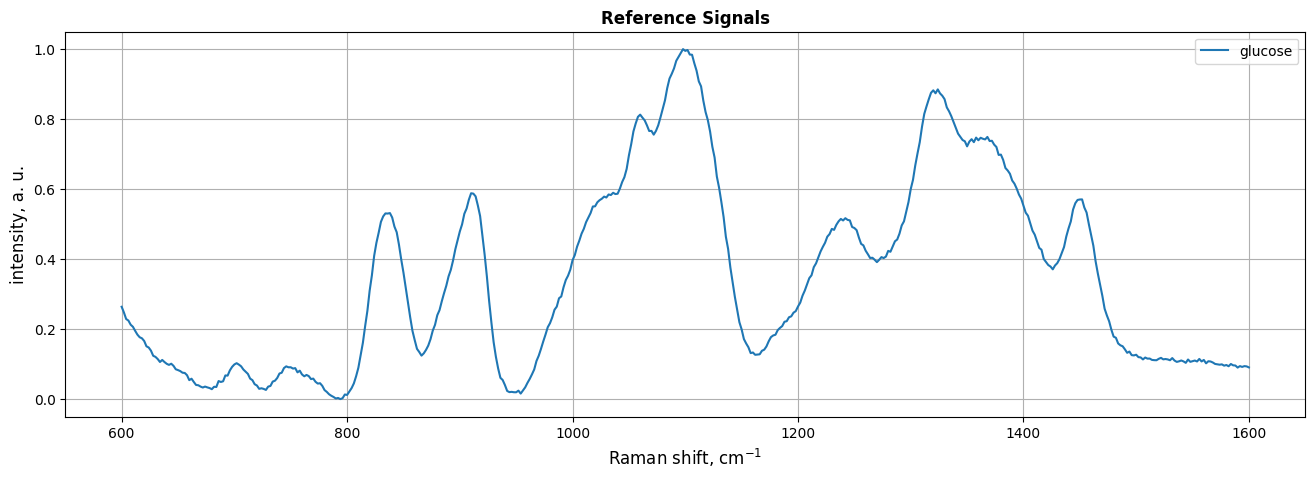

In [36]:
emsc = EMSC()
emsc.add_reference(name='glucose', signal=selected_ref.spectrum.values[0][:,1])
emsc.calculate_raman_shift(start=600, stop=1600, num=501)
emsc.plot_reference()

In [37]:
ref = pd.DataFrame(columns=["name","spectrum"])

In [38]:
row = pd.Series({'name': 'glucose', 'spectrum': np.array([1,2,3,4])})
print(row.to_frame().T)

      name      spectrum
0  glucose  [1, 2, 3, 4]


In [39]:
row = pd.DataFrame(data={'name':['glucose'], 'spectrum':[np.array([1,2,3,10])]})
print(row)

      name       spectrum
0  glucose  [1, 2, 3, 10]


In [40]:
pd.concat([ref,row], ignore_index=True)

,name,spectrum
0,glucose,"[1, 2, 3, 10]"


In [41]:
x = data.iloc[10].spectrum[:501,1]

In [42]:
x.shape

(501,)

In [45]:
data

,path,spectrum,name,grating,laser,exposure,accumulation,datetime,emsc,myemsc
8,../data/water/configuration/silicon_600_785 nm...,"[[600.082, 582.0], [602.27, 578.0], [604.458, ...",silicon,600,785 nm,30 s,3,2024-10-21 14:40:21,"[[600.082, 3.2302445014966983], [602.27, 3.082...","([[31.893273377100947], [418.7239608487395], [..."
20,../data/water/configuration/silicon_600_785 nm...,"[[600.082, 590.0], [602.27, 585.0], [604.458, ...",silicon,600,785 nm,30 s,3,2024-10-21 14:41:02,"[[600.082, 3.8604537193204833], [602.27, 3.666...","([[29.502364348954277], [401.33275368971687], ..."
23,../data/water/configuration/noise_600_785 nm_3...,"[[600.082, 41.5], [602.27, 31.5], [604.458, 44...",noise,600,785 nm,30 s,3,2024-10-21 14:41:56,"[[600.082, 0.8006153731116378], [602.27, -9.27...","([[0.9930600831260967], [36.877643072248176], ..."
21,../data/water/configuration/water-surface_600_...,"[[600.681, 338.333], [602.873, 333.667], [605....",water-surface,600,785 nm,30 s,1,2024-10-21 14:58:05,"[[600.681, 1.2408104839906902], [602.873, 1.12...","([[43.889959897992846], [189.42515606667675], ..."
10,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 979.333], [602.873, 981.667], [605....",water-7mm,600,785 nm,30 s,1,2024-10-21 15:01:19,"[[600.681, 0.6492069854445351], [602.873, 0.71...","([[72.45624453551086], [2031.2290746538245], [..."
9,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 2904.67], [602.873, 2937.0], [605.0...",water-7mm,600,785 nm,90 s,1,2024-10-21 15:06:19,"[[600.681, 0.6771576873470627], [602.873, 0.84...","([[231.61091852167144], [6082.093752380236], [..."
5,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 3872.67], [602.873, 3856.67], [605....",water-7mm,600,785 nm,120 s,1,2024-10-21 15:18:30,"[[600.681, 0.7396470953823147], [602.873, 0.71...","([[307.5306671964567], [8132.843908715986], [-..."
25,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 4813.33], [602.873, 4792.67], [605....",water-7mm,600,785 nm,150 s,1,2024-10-21 15:26:28,"[[600.681, 0.7152321711358678], [602.873, 0.69...","([[378.4460174388058], [10138.479336747778], [..."
13,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 5791.67], [602.873, 5759.67], [605....",water-7mm,600,785 nm,180 s,1,2024-10-21 15:36:23,"[[600.681, 0.7451342551690815], [602.873, 0.70...","([[456.1987780156325], [12125.851158799158], [..."
16,../data/water/configuration/water-7mm_600_785 ...,"[[600.681, 7579.67], [602.873, 7597.0], [605.0...",water-7mm,600,785 nm,240 s,1,2024-10-21 15:48:50,"[[600.681, 0.5970215159871788], [602.873, 0.65...","([[629.3671930000198], [16130.250996746578], [..."


In [165]:
def myemsc(row):
    reference = selected_ref.spectrum.values[0][:,1]
    # indices is Raman shift.
    indices = np.linspace(start=600, stop=1600, num=501)
    order = 2
    baseline = np.array([np.power(indices, o) for o in range(order + 1)]).T
    # If we have more reference signal, just append here
    model = np.hstack([reference.reshape(-1,1), baseline])
    print(model.shape)
    x = row.spectrum[:501,1]
    result = np.linalg.lstsq(model, x.reshape(-1,1), rcond=None)
    return result

data['myemsc'] = data.apply(myemsc, axis=1)


(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)
(501, 4)


In [166]:
for i, row in data.iterrows():
    msg = "["
    coeffs = row.myemsc[0].T[0]
    for c in coeffs:
        msg = f"{msg},{round(c,6)}"

    ratio = abs(coeffs[0]) / (abs(coeffs[1]) + abs(coeffs[2]) + abs(coeffs[3]))

    # print(msg)
    print( row['name'], row['exposure'], msg,']', ratio)

silicon 30 s [,31.893273,418.723961,-0.14875,0.000415 ] 0.07614065314756364
silicon 30 s [,29.502364,401.332754,-0.115453,0.0004 ] 0.07348976643889459
noise 30 s [,0.99306,36.877643,0.008551,-4e-06 ] 0.026922267565616876
water-surface 30 s [,43.88996,189.425156,0.064685,0.000155 ] 0.2316215151260354
water-7mm 30 s [,72.456245,2031.229075,-2.524985,0.001156 ] 0.03562682666179075
water-7mm 90 s [,231.610919,6082.093752,-7.667848,0.003518 ] 0.03803281637660757
water-7mm 120 s [,307.530667,8132.843909,-10.318505,0.004732 ] 0.03776548628977728
water-7mm 150 s [,378.446017,10138.479337,-12.858941,0.005888 ] 0.037280384869515515
water-7mm 180 s [,456.198778,12125.851159,-15.361535,0.007063 ] 0.03757437779122388
water-7mm 240 s [,629.367193,16130.250997,-20.54249,0.009442 ] 0.03896816745027998
water-7mm 300 s [,768.104571,20175.236881,-25.667653,0.011759 ] 0.0380232540087293
water-surface 300 s [,461.984502,1326.302567,0.994902,0.001442 ] 0.34806364861283995
water-surface 240 s [,355.849054,10

In [ ]:
water-7mm 30 s      [72.45624, 2031.22907,-2.52499,0.00116 ]
water-surface 30 s  [43.88996, 189.42516,0.06469,0.00015 ]
water-7mm 90 s      [231.61092, 6082.09375,-7.66785,0.00352 ]
water-surface 90 s  [138.20572, 410.69472,0.33106,0.00043 ]
water-7mm 120 s     [307.53067, 8132.84391,-10.31851,0.00473 ]
water-surface 120 s [182.49541, 535.58266,0.46219,0.00057 ]
water-7mm 150 s     [378.44602, 10138.47934,-12.85894,0.00589 ]
water-surface 150 s [232.18745, 696.68754,0.51252,0.00074 ]
water-7mm 180 s     [456.19878, 12125.85116,-15.36154,0.00706 ]
water-surface 180 s [279.38787, 800.40828,0.65016,0.00087 ]
water-7mm 240 s     [629.36719, 16130.251,-20.54249,0.00944 ]
water-surface 240 s [355.84905, 1021.62688,0.91371,0.00112 ]
water-7mm 300 s     [768.10457, 20175.23688,-25.66765,0.01176 ]
water-surface 300 s [461.9845, 1326.30257,0.9949,0.00144 ]


SyntaxError: invalid decimal literal (889422205.py, line 1)

In [ ]:
water-7mm 30 s      0.03562682666179075
water-7mm 90 s      0.03803281637660757
water-7mm 120 s      0.03776548628977728
water-7mm 150 s      0.037280384869515515
water-7mm 180 s      0.03757437779122388
water-7mm 240 s      0.03896816745027998
water-7mm 300 s      0.0380232540087293
water-surface 30 s   0.2316215151260354
water-surface 90 s   0.33624550388407604
water-surface 120 s      0.34044767251294716
water-surface 150 s      0.33302808675602447
water-surface 180 s      0.34877301902429236
water-surface 240 s      0.3480044416337268
water-surface 300 s      0.34806364861283995

/tmp/ipykernel_928/3458861876.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=['30', '90','120','150','180','240','300',])


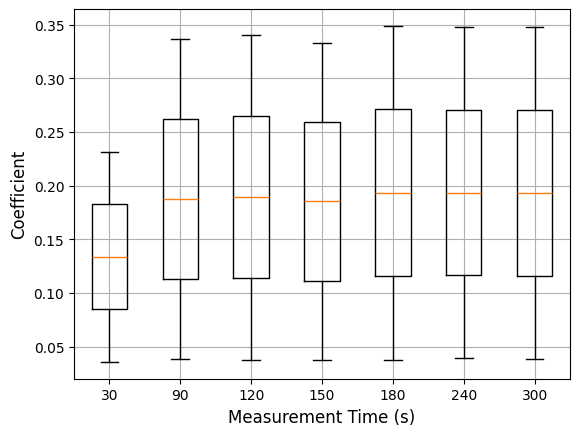

In [180]:
# plt.figure(figsize=(16,5))

# w7 = [72.45624,231.61092,307.53067,378.44602,456.19878,629.36719,768.10457]
# ws = [43.88996,138.20572,182.49541,232.18745,279.38787,355.84905,461.9845]
w7 = [0.03562682666179075,0.03803281637660757, 0.03776548628977728, 0.037280384869515515, 0.03757437779122388, 0.03896816745027998, 0.0380232540087293]
ws = [0.2316215151260354,0.33624550388407604, 0.34044767251294716,0.33302808675602447, 0.34877301902429236, 0.3480044416337268, 0.34806364861283995]
data = []
for a,b in zip(w7, ws):
    data.append((a,b))
plt.boxplot(data, labels=['30', '90','120','150','180','240','300',])
# plt.boxplot([w7, ws], labels=['water-7mm', 'water-surface'])
# plt.scatter(x=['water-surface'] * len(w7),y=ws)

# plt.legend()

plt.xlabel("Measurement Time (s)", fontsize = 12)
plt.ylabel("Coefficient", fontsize = 12)
# plt.title(title,fontsize = 12,fontweight="bold")
plt.grid()
plt.show()

## Ploting baseline with obscure

### Glass slide
<img src="https://irrorwxhpkioli5p.ldycdn.com/cloud/loBpnKkilpSRrjknoopniq/1.jpg" alt="drawing" width="400"/>

Definition: the common microscope glass slide is called `slide` and `glass` for calling the thin version.

In [ ]:
samples = ['silicon','silicon-glasslifted','silicon-slidelifted']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 4: The effect of glass slide")

In [ ]:
samples = ['silicon','silicon-glassontop','silicon-slideontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 5: The effect of glass slide")

In [ ]:
samples = ['silicon','silicon-glasslifted','silicon-glassontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 6: The effect of thin glass slide when it is in focus and out-of-focus")

Thin glass slide introduced the least effect when it is out of focus.

This could means that the laser is abel to penetrate through the thin glass slide with out an effect.

However, when the thin glass slide is directly on top of the sample, we can observe changes in the measurement.

This might be due to the substrate itself has Raman signal because it is in focus too.

### Tissue

<img src="https://www.stanleypackaging.com.au/wp-content/uploads/2023/08/SPF2180-1.jpg" alt="drawing" width="400"/>

Aseessing the penetration when the obscure is not so transparency but thin.

In [ ]:
samples = ['silicon','silicon-tissuelifted','silicon-tissueontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 7: When the obscure is mildly trasparency and thin")

It seems that the thin tissue completely blocked the laser (order the power of penetrated laser is too low).

Thus, the out-of-focus configuration only has Raman above 1000 cm^-1 which looks more like a fluorescence noise signal.

And, the in-focus configuration, we could not observe a peak of silicon.

### Liquid transparency

Here we ask, how would a obscure liquid effect the penetration.

To assess this, we have three liquid samples.

1. Tap water: representing the most transparency
2. Ethyl Alcohol: representing somewhat clear
3. Hot americano: representing mildly transparency

To assess the out-of-focus (lifted), we dropped the sample on a thin glass substrate since the substrate introduce minor effect on the Raman signal.

#### Tap water

In [ ]:
samples = ['silicon', 'silicon-glasslifted', 'silicon-waterdropletlifted','silicon-watersheetlifted']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 8: Tap water in the out-of-focus configuration.")

It is clear that even the clearest liquid has an effect on laser.

The droplet configuration causes laser to disperse because the shape of the suface is rounded and curved while the sheet configuration let the laser pass through easier.

However, because the laser travel through 4 mediums (air, water, thin glass, air) at an angle, there was some dispersion.

In [ ]:
samples = ['silicon','silicon-watersheetlifted','silicon-waterdropletontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 9: Tap water in the in-focus configuration.")

When the droplet is placed on top of the silicon, it acts as a magnifying glass.

#### Ethyl Alcohol

In [ ]:
samples = ['silicon','silicon-alcholsheetlifted','silicon-alcholdropletontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 10: Ethyl alcohol but this is not trustable")

It is not trustable because the ethyl alcohol evaporate quickly during the measurement.
But we could still see some effect of the sample.

#### Coffee

In [ ]:
samples = ['silicon','silicon-coffeesheetlifted','silicon-coffeedropletontop']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 11: Americano")

In [ ]:
samples = ['silicon','silicon-coffeesheetlifted']
plot(data=data.loc[data.name.isin(samples)], title="Fig. 12: Americano")

Americano in the droplet configuration emit a hughe Raman in the measurement.